# MILESTONE 1 - DATA SANITY

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Use the PRS dataset to create a dataframe


In [2]:
df=pd.read_csv('Final.csv')

# 2. Check the description of the dataframe

In [3]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


# 3. Check the shape of the dataframe

In [4]:
df.shape

(1101925, 16)

# 4. Check the data frame informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

# 5. Check for the Null values in the dataframe

In [6]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

# 6. Replace all the null values with "NaN"


In [7]:
df=df.fillna("NaN")
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
151348,958876796,2975,Macao,North-Region,"0,00",9999,3320,20220315,80723,SR04,898535374,"4554,85",20220318,PLN,64.0,1230009786
424117,841472556,3419,French Southern Territories,South-Region,"0,00",X001,3670,20220125,100206,NR01,920938114,"50,40",20220201,USD,NaN,1230014202
953084,816794087,4192,Yemen,South-Region,"153,00",X001,3670,20220520,100029,NR04,771224546,"153,00",20220513,USD,93.0,1230024792
849011,836055112,3918,Chile,North-Region,"0,00",X000,3660,20220427,151626,SR03,966489516,"5,80",20220427,USD,NaN,1230024034
203277,855533053,2189,France,North-Region,"0,00",F001,3130,20220406,170148,NR02,800059003,"529,48",20220406,EUR,NaN,1230011298


# 7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [8]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")
df['ORDER_CREATION_DATE'].head(3)

0   2022-01-01
1   2022-01-01
2   2022-01-01
Name: ORDER_CREATION_DATE, dtype: datetime64[ns]

# 8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"


In [9]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")
df['REQUESTED_DELIVERY_DATE'].head(3)

0   2022-01-13
1   2022-01-11
2   2022-01-12
Name: REQUESTED_DELIVERY_DATE, dtype: datetime64[ns]

# 9. Sanity check - Check how many records are having order date greater than the delivery date


In [10]:
 len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']])

27142

# 10. Remove those records where order date is greater than the delivery date 
 

In [11]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
df.shape

(1074783, 16)

# 11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.


In [12]:
len(df[df['ORDER_AMOUNT'].str.contains('-')])

32

# 12. Replace “-” with “” from the “ORDER_AMOUNT” field.

In [13]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace("-", "")
df['ORDER_AMOUNT'].sample(3)

154169        0,00
1054143    6589,20
585039        0,00
Name: ORDER_AMOUNT, dtype: object

# 13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..


In [14]:
len(df[df['ORDER_AMOUNT'].str.contains(",")])

1073406

# 14. Replace “,” with “.” from the “ORDER_AMOUNT” field. 


In [15]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")
df['ORDER_AMOUNT'].sample(3)

721136       0.00
1059495    103.08
629418     101.36
Name: ORDER_AMOUNT, dtype: object

In [16]:
df.sample(3)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
221056,769193324,4204,Azerbaijan,South-Region,"0,00",2590,3220,2022-04-13,145902,SR03,758747862,901.09,2022-04-21,EUR,NaN,1230021722
282732,876830057,4304,Qatar,North-Region,"0,00",9999,3220,2022-05-17,163130,NR03,956743215,796.74,2022-05-24,EUR,NaN,1230020371
962264,780353244,4425,Palau,North-Region,"0,00",X000,3660,2022-05-23,111437,NR03,804432075,1480.32,2022-07-25,USD,NaN,1230014329


# 15. Count the number of records where the order date and the delivery date are same


In [17]:
(df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date).sum()

100437

# 16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”


In [18]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 


In [19]:
exchange_rates = {
    'USD': 1,
    'EUR': 0.93,
    'AUD': 1.53,
    'CAD': 1.36,
    'GBP': 0.81,
    'MYR': 4.63,
    'PLN': 4.20,
    'AED': 3.67,
    'HKD': 7.83,
    'CHF': 0.91,
    'RON': 4.61,
    'SGD': 1.35,
    'CZK': 22.02,
    'HU1': 347.32,
    'NZD': 1.65,
    'BHD': 0.38,
    'SAR': 3.75,
    'QAR': 3.64,
    'KWD': 0.31,
    'SEK': 10.79
}
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
df['amount_in_usd'] = df.apply(lambda row: row['ORDER_AMOUNT'] / exchange_rates.get(row['ORDER_CURRENCY'], 1), axis=1)
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
382825,849530608,3215,Rwanda,South-Region,"0,00",X001,3670,2022-01-18,210030,NR01,796863815,950.40,2022-01-24,USD,NaN,1230013566,950.400000
414356,839975418,4394,Israel,North-Region,"0,00",X000,3660,2022-01-23,200952,SR02,898588129,335.12,2022-02-03,USD,NaN,1230014337,335.120000
1081234,792253976,3658,Taiwan,North-Region,"0,00",9999,3000,2022-05-01,210045,NR03,888397671,64.37,2022-05-04,AUD,64.0,1230011798,42.071895
420913,944299047,3541,Argentina,South-Region,"0,00",X001,3670,2022-01-25,30026,SR04,853077988,0.00,2022-01-25,USD,NaN,1230014201,0.000000
1004620,928947535,4228,Japan,North-Region,"0,00",X000,3660,2022-06-01,220559,SR04,808027501,0.00,2022-06-10,USD,NaN,1230014354,0.000000


# 18. Check for values “0” in the “'amount_in_usd” column. 

In [20]:
len(df[df['amount_in_usd'] == 0].axes[0])

237821

# 19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [21]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
558200,903503266,3091,Gambia,North-Region,"0,00",X000,3660,2022-02-23,190051,SR01,823005360,614.81,2022-03-10,USD,NaN,1230014342,614.810000,12300143423660
656494,819885433,3484,Christmas Island,South-Region,"0,00",X001,3670,2022-03-14,220042,NR02,938800651,0.00,2022-03-28,USD,NaN,1230014212,0.000000,12300142123670
894013,765957384,2376,Kuwait,North-Region,"0,00",C000,3590,2022-05-06,121447,NR02,988180178,256.61,2022-05-14,CAD,NaN,1230014296,188.683824,12300142963590
893044,758564854,3665,Papua New Guinea,North-Region,"0,00",X000,3660,2022-05-05,174442,NR04,795295340,12.60,2022-05-05,USD,NaN,1230024034,12.600000,12300240343660
26641,818937653,3766,British Virgin Islands,North-Region,"3268,90",9999,3320,2022-01-17,220337,SR02,996760947,2558.04,2022-01-20,PLN,93.0,1230023961,609.057143,12300239613320


# MILESTONE 2 - EDA

In [22]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a Histogram on DISTRIBUTION_CHANNEL

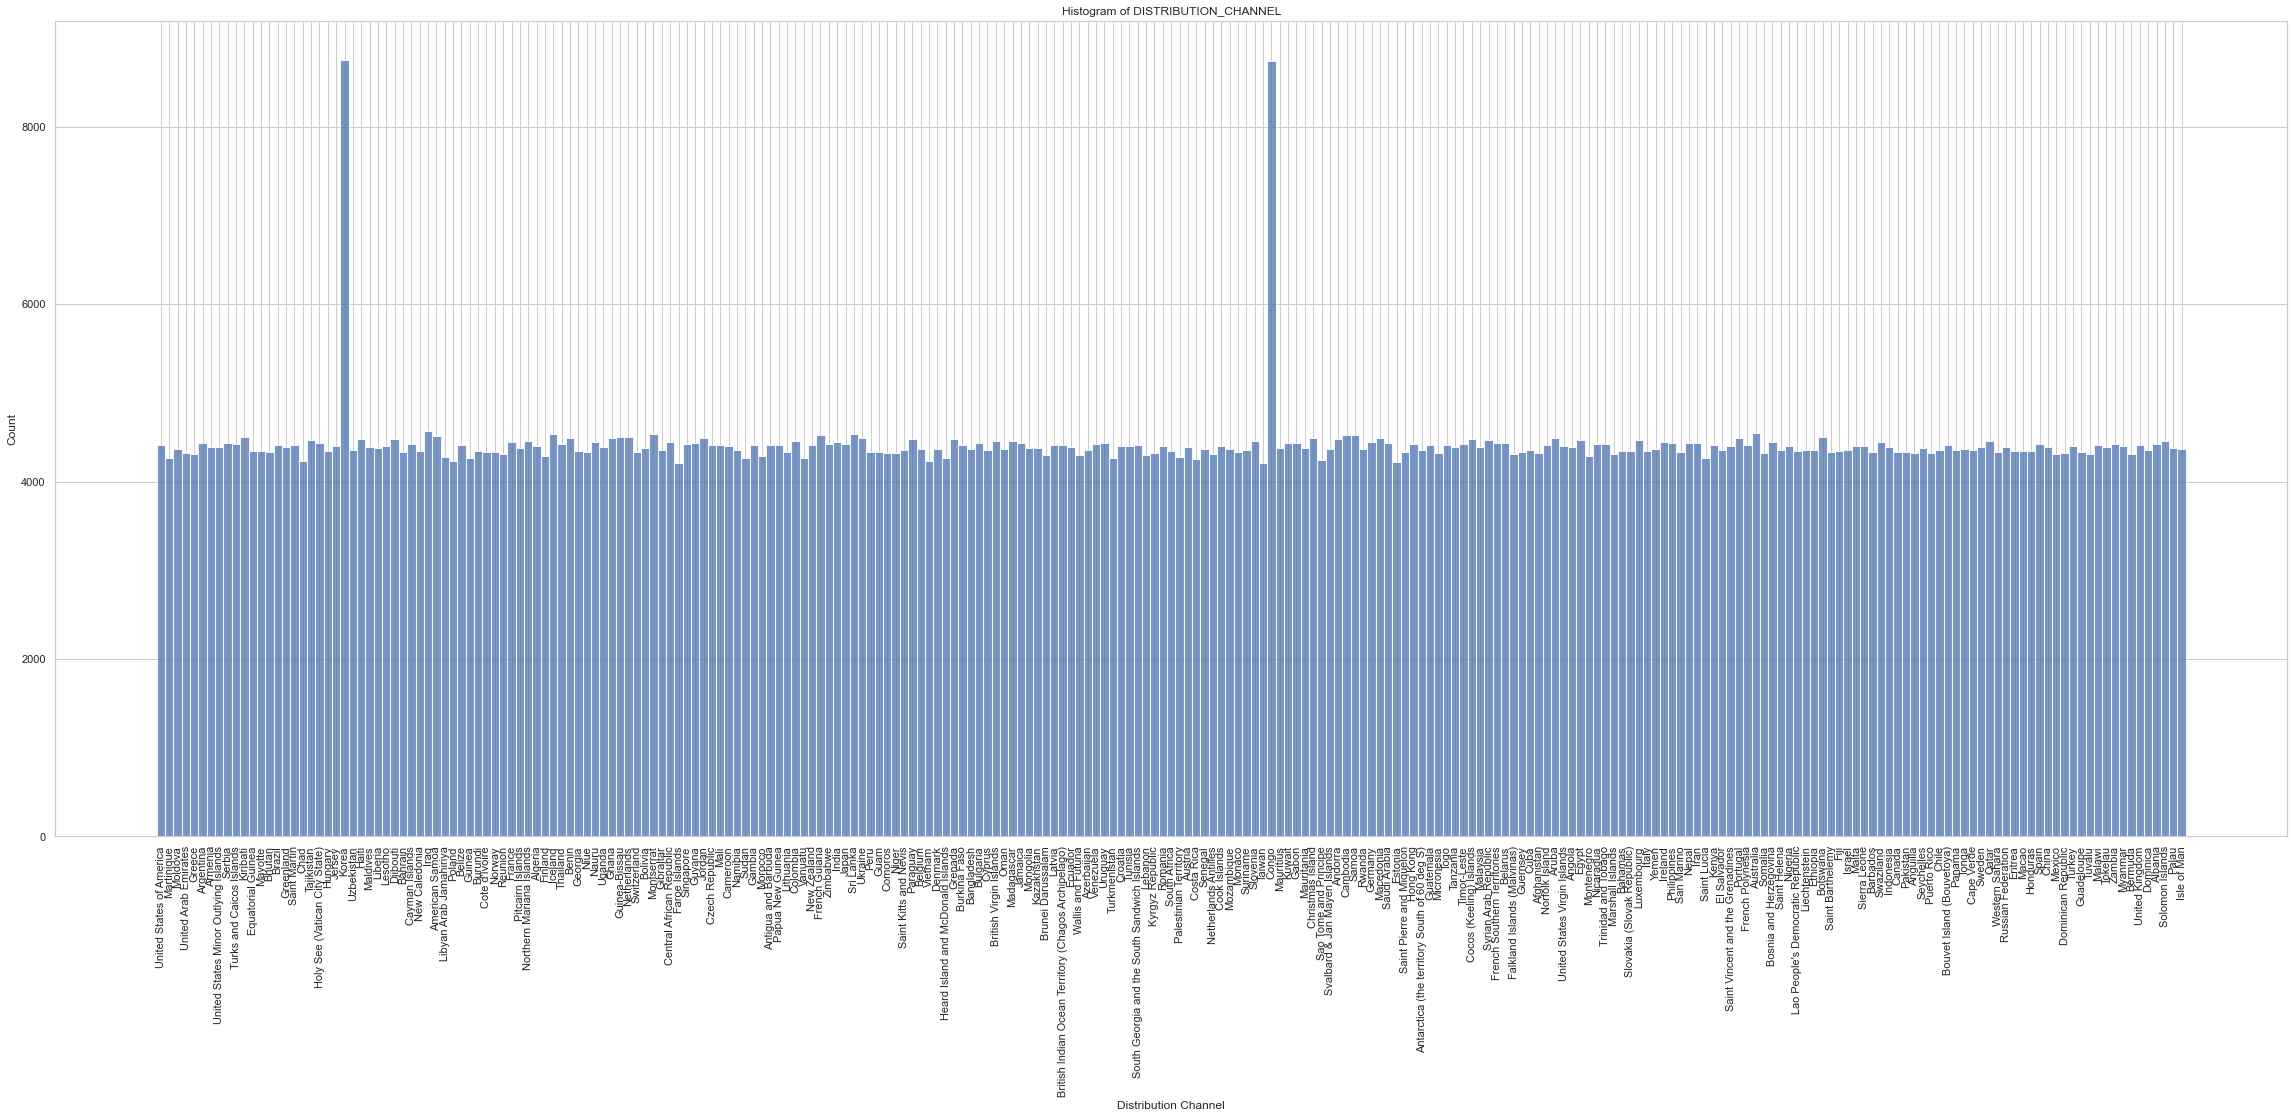

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(40,15))
sns.histplot(data=df, x='DISTRIBUTION_CHANNEL')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.title('Histogram of DISTRIBUTION_CHANNEL')
plt.show()

# 2. Create a Pie Chart on ORDER_CURRENCY


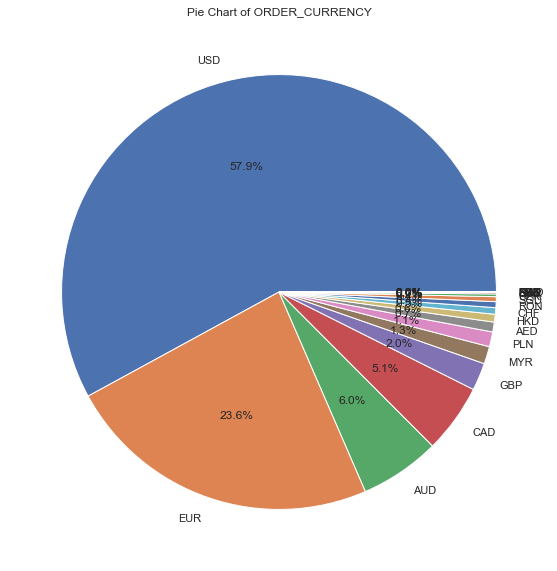

In [24]:
# fig = px.pie(data_frame=df, names='ORDER_CURRENCY')
# fig.show()
plt.figure(figsize=(10,10))
order_currency_counts = df['ORDER_CURRENCY'].value_counts()
plt.pie(order_currency_counts, labels=order_currency_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of ORDER_CURRENCY')
plt.show()

# 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL


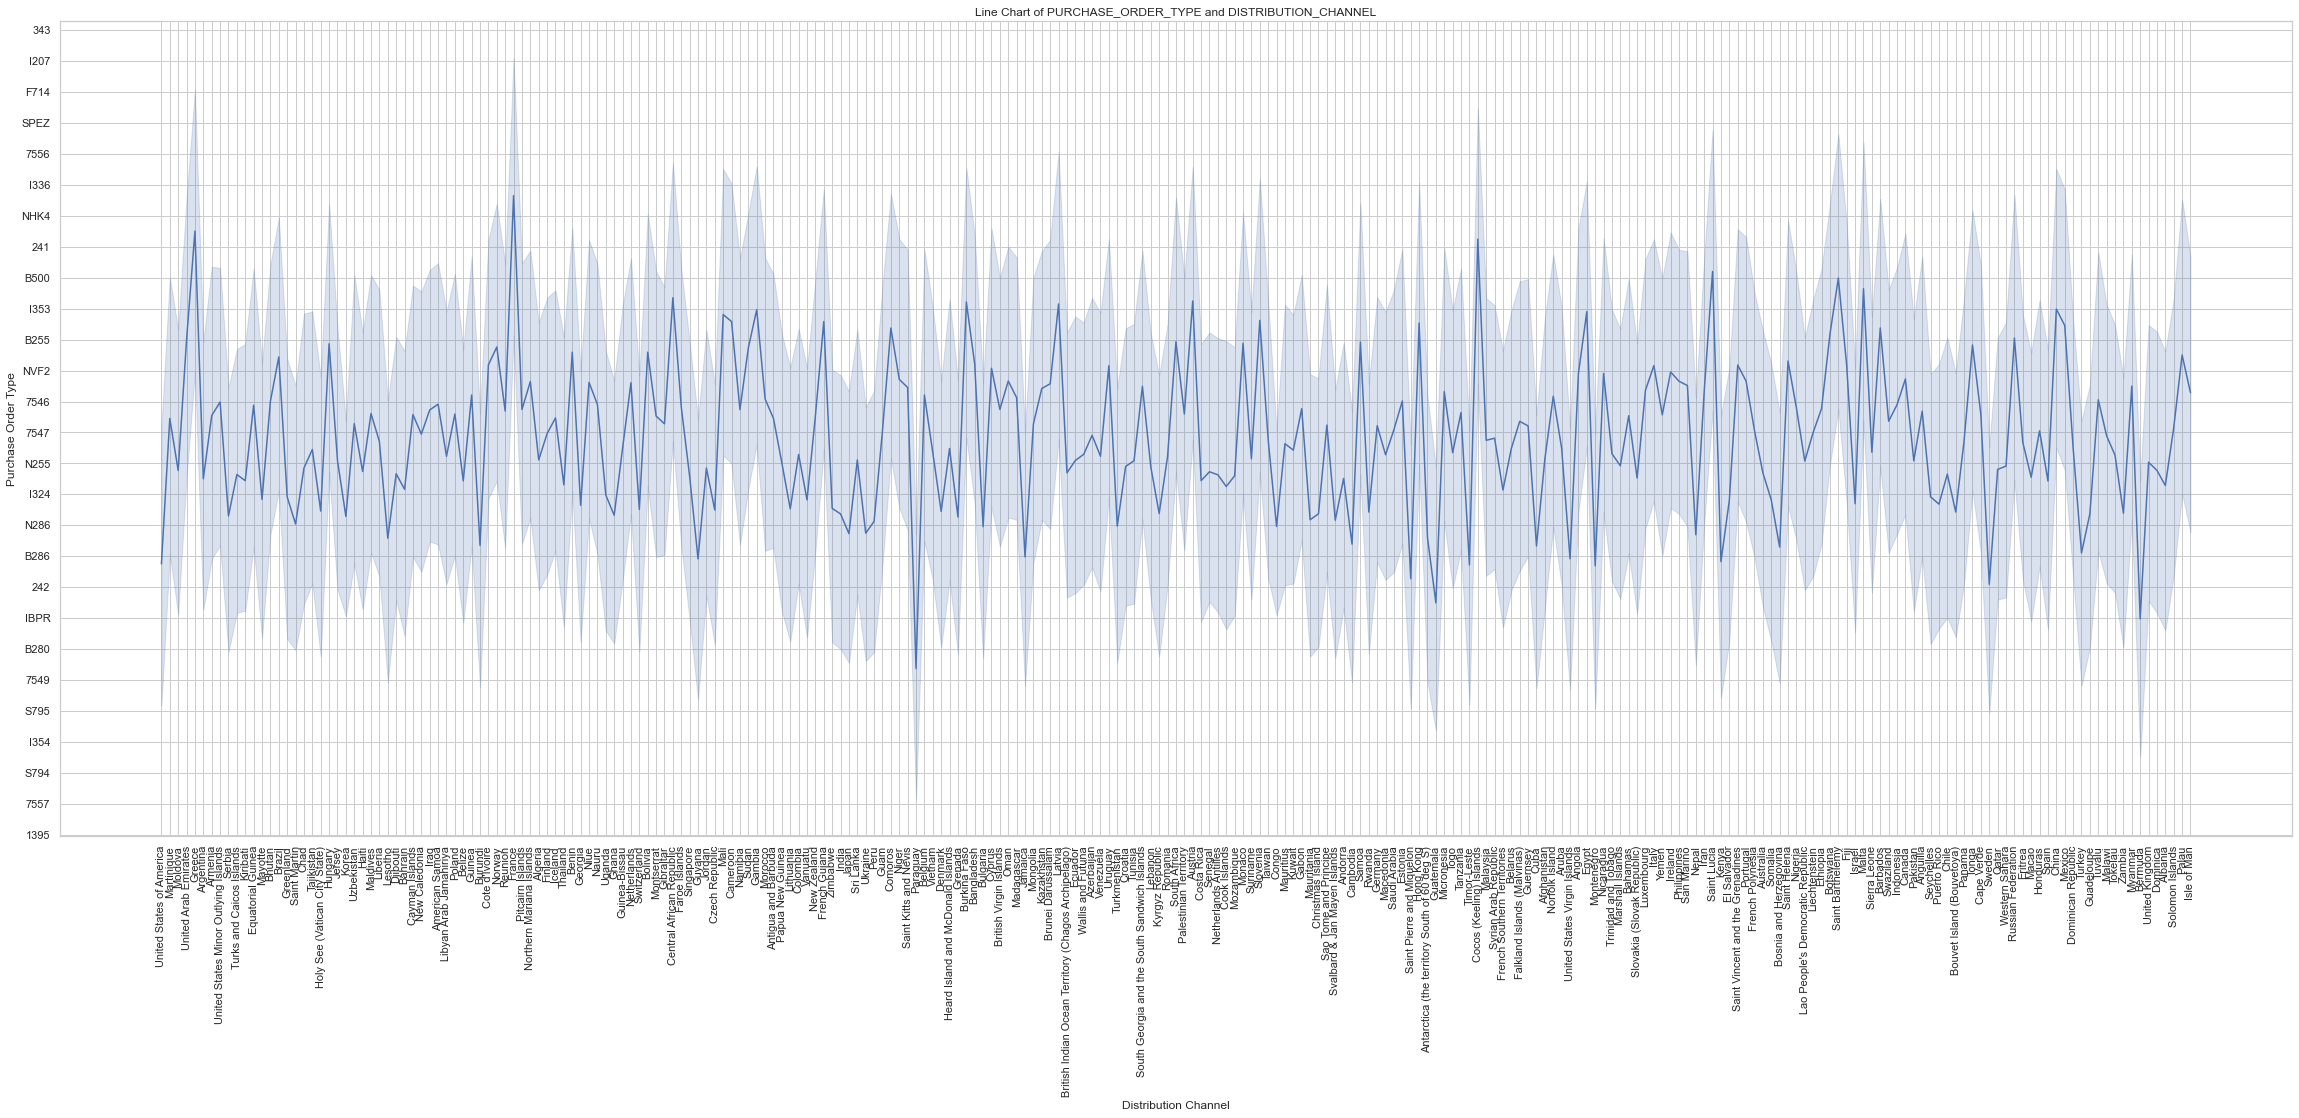

In [25]:
plt.figure(figsize=(40,15))
sns.lineplot(data=df,x='DISTRIBUTION_CHANNEL', y='PURCHASE_ORDER_TYPE')
plt.ylabel('Purchase Order Type')
plt.xlabel('Distribution Channel')
plt.xticks(rotation='vertical')
plt.title('Line Chart of PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL')
plt.show()

# 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd


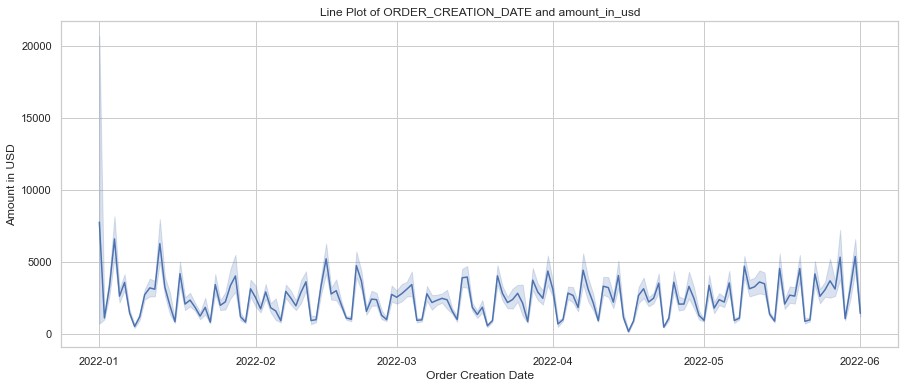

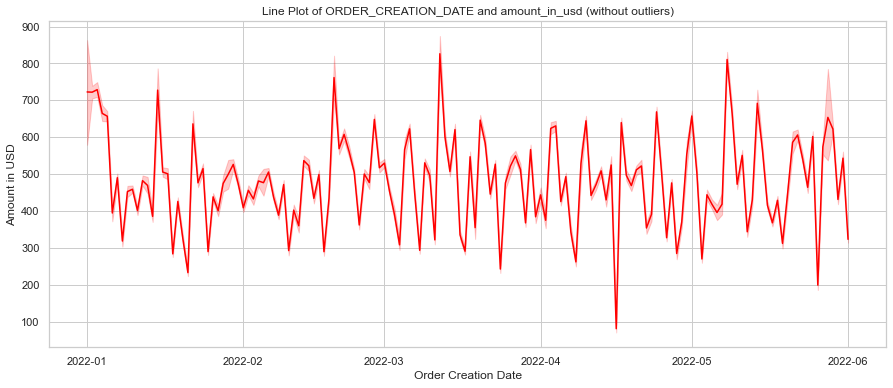

In [26]:
# fig = px.line(data_frame=df, x='ORDER_CREATION_DATE', y='amount_in_usd')
# fig.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='ORDER_CREATION_DATE', y='amount_in_usd')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd')
plt.show()
threshold = df['amount_in_usd'].quantile(0.95)
filtered_df = df[df['amount_in_usd'] <= threshold]
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_df, x='ORDER_CREATION_DATE', y='amount_in_usd', color='red')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd (without outliers)')
plt.show()

# 5. Create a boxplot on ORDER_AMOUNT	to find out the outliers


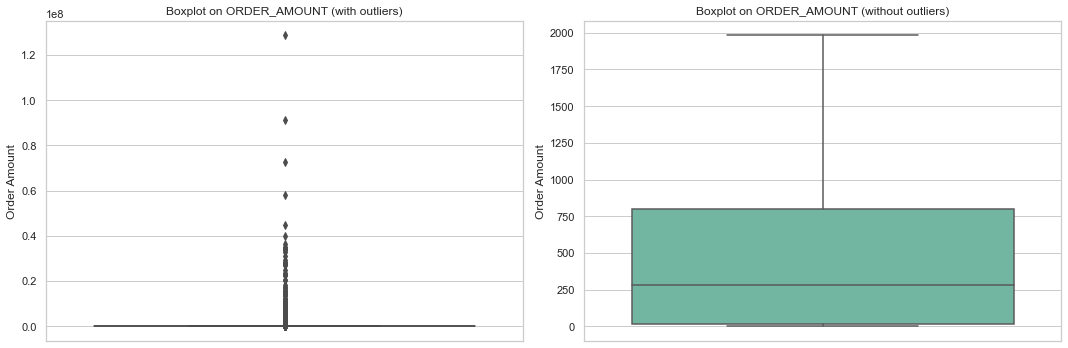

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, y='ORDER_AMOUNT', ax=axes[0], palette='Set1')
axes[0].set_ylabel('Order Amount')
axes[0].set_title('Boxplot on ORDER_AMOUNT (with outliers)')
sns.boxplot(data=df, y='ORDER_AMOUNT', ax=axes[1], showfliers=False, palette='Set2')
axes[1].set_ylabel('Order Amount')
axes[1].set_title('Boxplot on ORDER_AMOUNT (without outliers)')
plt.tight_layout()
plt.show()

# 6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

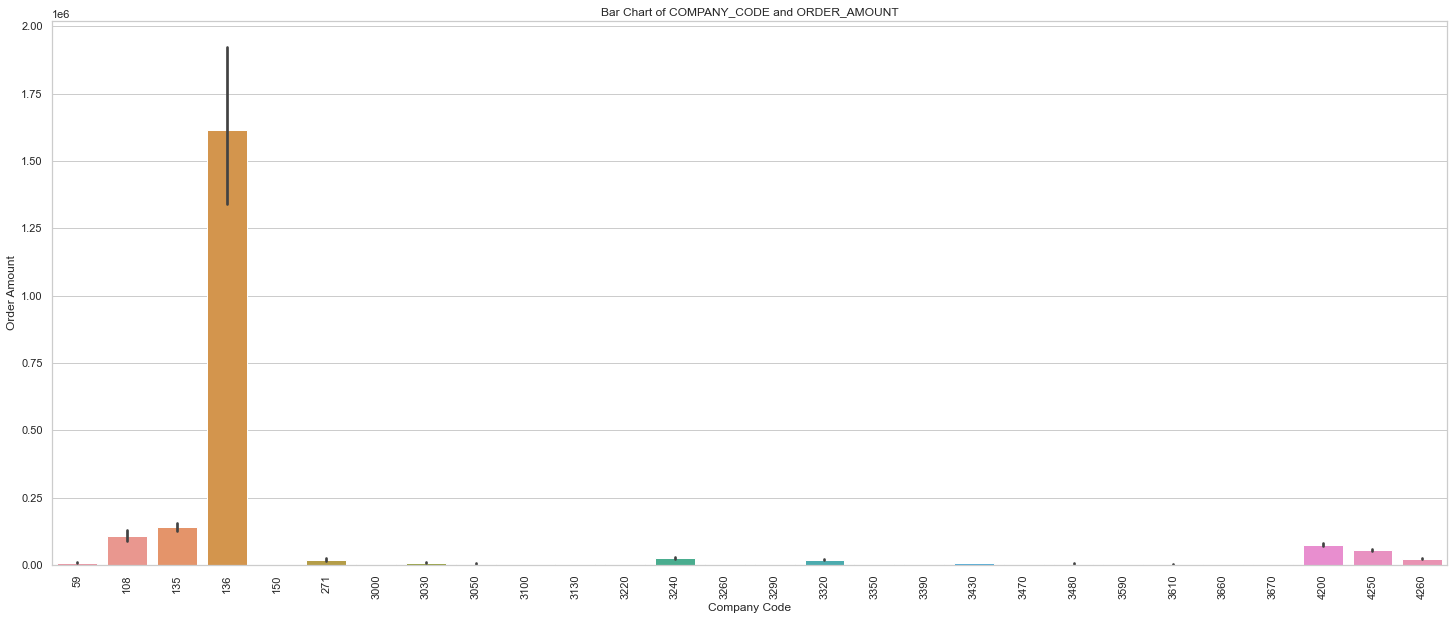

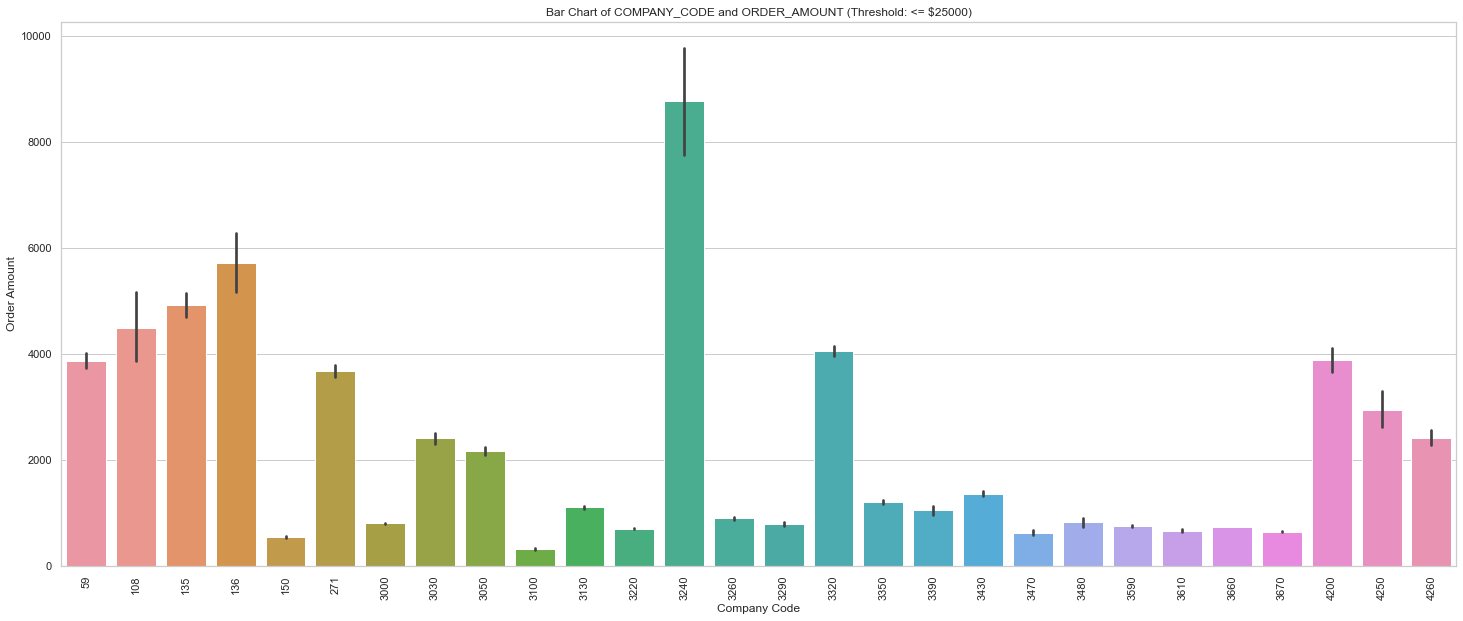

In [28]:
plt.figure(figsize=(25,10))
sns.barplot(data=df, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code') 
plt.ylabel('Order Amount')
plt.title('Bar Chart of COMPANY_CODE and ORDER_AMOUNT')
plt.xticks(rotation='vertical')
plt.show()
plt.figure(figsize=(25,10))
filtered_df = df[df['ORDER_AMOUNT'] <= 25000]
sns.barplot(data=filtered_df, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar Chart of COMPANY_CODE and ORDER_AMOUNT (Threshold: <= $25000)')
plt.xticks(rotation='vertical')
plt.show()

# Milestone 3 - Feature Engineering and Selection

# 1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.



In [30]:
q1 = df['amount_in_usd'].quantile(0.25)
q3 = df['amount_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['amount_in_usd'].median()
num_outlier=(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)
df['amount_in_usd'] = np.where(num_outlier,median_value,df['amount_in_usd'])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
682892,947224030,3876,Vanuatu,South-Region,"0,00",X001,3670,2022-03-18,20038,NR03,890774353,0.0,2022-03-22,USD,NaN,1230014201,0.000000,12300142013670
952613,904648268,4085,China,South-Region,"0,00",C004,3590,2022-05-20,70108,NR02,924700314,352.8,2022-06-06,CAD,NaN,1230002613,259.411765,12300026133590
317249,906303636,3978,Montenegro,North-Region,"0,00",X000,3660,2022-01-04,135154,SR01,766787148,5.4,2022-01-04,USD,NaN,1230024034,5.400000,12300240343660
73685,785226329,3369,Malawi,South-Region,"0,00",S000,3390,2022-02-07,165020,NR04,955889864,0.0,2022-02-17,CHF,64.0,1210324912,0.000000,12103249123390
1061361,995039374,2499,Qatar,North-Region,"0,00",9999,3000,2022-03-29,73321,NR04,936967414,1299.4,2022-03-29,AUD,64.0,1210417298,849.281046,12104172983000


# 2. Label encoding or One hot Encoding on all the categorical columns 


In [31]:
label_encoder = LabelEncoder()
categorical_columns = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
889787,781563840,2293,38,1,"0,00",344,3670,2022-05-05,70258,5,890116511,416.91,2022-05-23,19,NaN,1230024538,416.91,12300245383670
330549,775675238,2324,195,1,"0,00",344,3670,2022-01-07,190155,2,819245247,178.20,2022-01-28,19,NaN,1230014201,178.20,12300142013670
708105,766116872,2702,36,0,"0,00",343,3660,2022-03-23,175401,1,994839313,264.22,2022-04-07,19,NaN,1230014342,264.22,12300143423660
950781,785204522,3364,228,1,"0,00",344,3670,2022-05-19,170456,4,894037604,0.00,2022-06-01,19,NaN,1230000901,0.00,12300009013670
527194,771506983,3618,86,0,"0,00",343,3660,2022-02-18,160211,6,757260054,21.31,2022-02-18,19,NaN,1230024034,21.31,12300240343660


# 3. Log Transformations on continuous columns 


In [32]:
continuous_columns = ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_DATE', 
                      'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'REQUESTED_DELIVERY_DATE', 
                      'CREDIT_STATUS', 'CUSTOMER_NUMBER']
df[continuous_columns] = df[continuous_columns].apply(pd.to_numeric, errors='coerce')
df[continuous_columns] = df[continuous_columns].replace(0, np.nan)
df[continuous_columns] = df[continuous_columns].mask(df[continuous_columns] < 0)
df[continuous_columns] = np.log(df[continuous_columns])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
176636,20.702063,8.289288,226,1,"0,00",23,8.077137,41.946195,11.540628,7,20.516890,378.90,41.949335,6,NaN,20.930298,407.419355,12300217223220
336229,20.560315,7.656337,137,0,"0,00",343,8.205218,41.942203,9.482045,5,20.603407,0.00,41.942624,19,4.532599,20.930292,0.000000,12300143303660
805348,20.643392,8.322151,49,0,"0,00",343,8.205218,41.947452,12.133238,0,20.684121,253.25,41.947976,19,NaN,20.930292,253.250000,12300143423660
270624,20.622357,8.005701,94,0,"0,00",126,8.039157,41.948656,11.636169,0,20.497466,181.33,41.949074,6,NaN,20.930297,194.978495,12300203443100
281808,20.670661,8.122668,104,0,"0,00",104,8.107720,41.948970,11.556961,5,20.530238,33966.00,41.949126,13,4.158883,20.930287,260.627451,12300086453320


# 4. Try to extract new features by grouping existing columns 


In [33]:
# Example 1: Sum of ORDER_AMOUNT for each DISTRIBUTION_CHANNEL
grouped_df1 = df.groupby('DISTRIBUTION_CHANNEL')['ORDER_AMOUNT'].sum().reset_index()
grouped_df1.rename(columns={'ORDER_AMOUNT': 'TOTAL_ORDER_AMOUNT'}, inplace=True)

# Example 2: Count of unique CUSTOMER_NUMBER for each DIVISION
grouped_df2 = df.groupby('DIVISION')['CUSTOMER_NUMBER'].nunique().reset_index()
grouped_df2.rename(columns={'CUSTOMER_NUMBER': 'UNIQUE_CUSTOMERS'}, inplace=True)

# Example 3: Mean of CREDIT_STATUS for each SALES_ORG
grouped_df3 = df.groupby('SALES_ORG')['CREDIT_STATUS'].mean().reset_index()
grouped_df3.rename(columns={'CREDIT_STATUS': 'AVERAGE_CREDIT_STATUS'}, inplace=True)

# Merge the new features back into the original DataFrame
df = df.merge(grouped_df1, on='DISTRIBUTION_CHANNEL', how='left')
df = df.merge(grouped_df2, on='DIVISION', how='left')
df = df.merge(grouped_df3, on='SALES_ORG', how='left')

df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS
906692,20.475582,8.095599,206,1,"0,00",344,8.207947,41.948813,11.983635,4,...,1057.50,41.949388,19,NaN,20.930292,1057.500000,12300142023670,1.433364e+07,3189,4.286163
380252,20.688641,7.951207,62,0,"0,00",154,8.185907,41.942729,12.206173,1,...,31260.48,41.943518,3,NaN,20.930292,260.627451,12300142883590,1.332255e+07,3532,4.280379
908988,20.623851,7.989560,52,0,"0,00",343,8.205218,41.948865,12.124369,3,...,22.86,41.949440,19,NaN,20.930292,22.860000,12300143423660,1.806973e+07,3532,4.302801
906554,20.637780,8.235626,151,1,"0,00",344,8.207947,41.948813,6.272877,3,...,239.40,41.951319,19,NaN,20.930292,239.400000,12300142013670,2.592624e+07,3189,4.284533
263877,20.480946,8.279190,98,1,"0,00",47,8.077137,41.948447,10.875156,1,...,0.00,41.948970,6,NaN,16.326069,0.000000,123118073220,3.434898e+07,3189,4.299082


# 5. Create a heatmap to find correlation between the columns


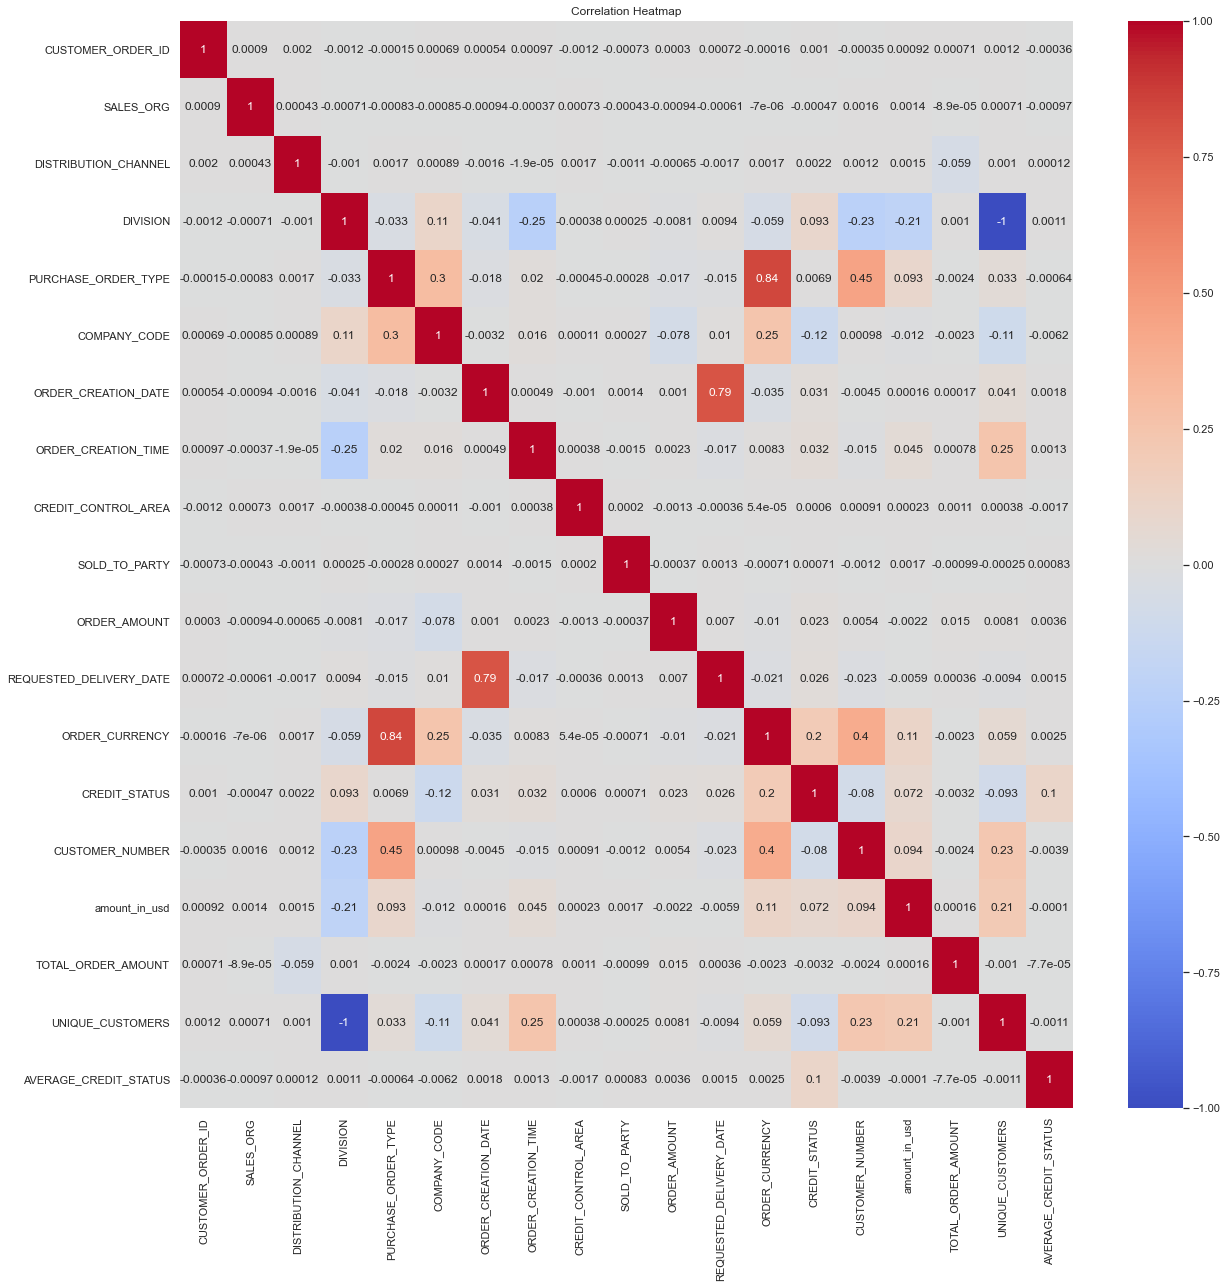

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 6. Try to identify important or relevant columns for feature extraction

In [35]:
corr_matrix = df.corr()
threshold = 0.5
relevant_columns = []
target_variable = 'REQUESTED_DELIVERY_DATE'  
for col in corr_matrix.columns:
    if abs(corr_matrix[target_variable][col]) >= threshold:
        relevant_columns.append(col)
print('Relevant columns for feature extraction:', relevant_columns)

Relevant columns for feature extraction: ['ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE']


In [36]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y-%m-%d')
df['Day'] = df['ORDER_CREATION_DATE'].dt.day
df['Month'] = df['ORDER_CREATION_DATE'].dt.month
df['Year'] = df['ORDER_CREATION_DATE'].dt.year
df = df.sort_values('ORDER_CREATION_DATE')
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
1036256,20.697309,7.694848,137,1,"0,00",335,8.357024,1970-01-01 00:00:00.000000041,11.850333,3,...,4.158883,16.311831,260.627451,121377564260,1.320224e+07,3189,4.250866,1,1,1970
452300,20.502235,8.403128,9,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,11.291468,3,...,NaN,20.930292,103.200000,12300142123670,4.679846e+07,3189,4.301803,1,1,1970
239571,20.644593,8.396832,192,1,"235,19",235,8.089482,1970-01-01 00:00:00.000000041,11.983192,0,...,4.532599,16.310283,207.290323,121189793260,2.177281e+07,3189,4.314356,1,1,1970
688288,20.480834,8.336630,194,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,3.713572,4,...,NaN,20.930292,0.000000,12300142013670,1.324654e+07,3189,4.278131,1,1,1970
122945,20.618058,8.157084,93,1,"0,00",199,8.048788,1970-01-01 00:00:00.000000041,11.931682,6,...,NaN,16.314310,0.000000,121678793130,2.837165e+07,3189,4.294330,1,1,1970


# MILESTONE 4

# 1. Modify the dataset to pass into any type of machine learning models. 


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  float64       
 1   SALES_ORG                1074783 non-null  float64       
 2   DISTRIBUTION_CHANNEL     1074783 non-null  int32         
 3   DIVISION                 1074783 non-null  int32         
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1074783 non-null  int32         
 6   COMPANY_CODE             1074783 non-null  float64       
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074782 non-null  float64       
 9   CREDIT_CONTROL_AREA      1074783 non-null  int32         
 10  SOLD_TO_PARTY            1074783 non-null  float64       
 11  ORDER_AMOUNT             1074751 non-null  float64       
 12  

In [38]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,...,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
count,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074782e+06,1.074783e+06,1.074783e+06,1.074751e+06,...,1.074783e+06,211327.000000,1.074783e+06,1.074751e+06,1.074783e+06,1.074783e+06,1.074783e+06,1074783.0,1074783.0,1074783.0
mean,2.058795e+01,8.080050e+00,1.205838e+02,4.602594e-01,2.564050e+02,8.087983e+00,1.150815e+01,3.503889e+00,2.058796e+01,5.677475e+03,...,1.328734e+01,4.292079,2.033116e+01,3.474120e+02,2.518891e+07,3.374131e+03,4.292032e+00,1.0,1.0,1970.0
std,8.127454e-02,2.175806e-01,7.002496e+01,4.984184e-01,1.159759e+02,4.824271e-01,1.238963e+00,2.292239e+00,8.128225e-02,2.479617e+05,...,6.991083e+00,0.188393,1.547963e+00,3.972901e+02,1.600061e+07,1.709575e+02,1.964429e-02,0.0,0.0,0.0
min,2.044018e+01,7.649693e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.077537e+00,6.931472e-01,0.000000e+00,2.044018e+01,0.000000e+00,...,0.000000e+00,3.951244,1.630872e+01,0.000000e+00,9.255248e+06,3.189000e+03,4.225321e+00,1.0,1.0,1970.0
25%,2.051863e+01,7.901748e+00,6.000000e+01,0.000000e+00,1.270000e+02,8.089482e+00,1.132679e+01,2.000000e+00,2.051851e+01,1.540000e+01,...,6.000000e+00,4.158883,2.093029e+01,1.354839e+01,1.572617e+07,3.189000e+03,4.278370e+00,1.0,1.0,1970.0
50%,2.059132e+01,8.103192e+00,1.200000e+02,0.000000e+00,3.430000e+02,8.205218e+00,1.193306e+01,4.000000e+00,2.059129e+01,2.823200e+02,...,1.900000e+01,4.158883,2.093029e+01,2.606275e+02,2.099225e+07,3.532000e+03,4.292083e+00,1.0,1.0,1970.0
75%,2.065893e+01,8.270781e+00,1.810000e+02,1.000000e+00,3.440000e+02,8.207947e+00,1.213088e+01,6.000000e+00,2.065897e+01,8.024300e+02,...,1.900000e+01,4.532599,2.093029e+01,4.938167e+02,2.744585e+07,3.532000e+03,4.305679e+00,1.0,1.0,1970.0
max,2.072227e+01,8.414052e+00,2.420000e+02,1.000000e+00,3.500000e+02,8.357024e+00,1.237141e+01,7.000000e+00,2.072227e+01,1.286378e+08,...,1.900000e+01,4.532599,2.093030e+01,1.806677e+03,1.467677e+08,3.532000e+03,4.381802e+00,1.0,1.0,1970.0


In [39]:
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
199627,20.468313,8.345930,135,1,"0,00",25,8.077137,1970-01-01 00:00:00.000000041,10.921052,2,...,NaN,16.326069,0.00,123118073220,26316043.90,3189,4.268827,1,1,1970
798081,20.567924,8.265907,62,0,"0,00",343,8.205218,1970-01-01 00:00:00.000000041,12.122794,2,...,NaN,20.930292,506.66,12300143423660,13322550.60,3532,4.324045,1,1,1970
573625,20.493080,8.370548,20,0,"0,00",343,8.205218,1970-01-01 00:00:00.000000041,12.209273,3,...,NaN,20.930292,434.93,12300143373660,15214846.58,3532,4.251840,1,1,1970
801328,20.470472,7.945910,18,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,4.025352,1,...,NaN,20.930292,112.80,12300142013670,19007629.23,3189,4.285850,1,1,1970
381044,20.450655,8.350666,233,0,"0,00",343,8.205218,1970-01-01 00:00:00.000000041,12.207247,0,...,NaN,20.930292,97.44,12300143423660,17942294.72,3532,4.300442,1,1,1970


In [42]:
df = df.drop(['CUSTOMER_ORDER_ID','ORDER_CREATION_DATE','CREDIT_CONTROL_AREA',
              'TOTAL_ORDER_AMOUNT','ORDER_CREATION_DATE', 'unique_cust_id',
              'AVERAGE_CREDIT_STATUS','ORDER_CREATION_TIME','Day','Month','Year',
             'SALES_ORG','DISTRIBUTION_CHANNEL','SOLD_TO_PARTY'], axis=1)
df = df.fillna(0)

encoder = LabelEncoder()
df['RELEASED_CREDIT_VALUE'] = encoder.fit_transform(df['RELEASED_CREDIT_VALUE'])
X = df.drop('amount_in_usd', axis=1)
y = df['amount_in_usd']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DIVISION                 1074783 non-null  int32  
 1   RELEASED_CREDIT_VALUE    1074783 non-null  int32  
 2   PURCHASE_ORDER_TYPE      1074783 non-null  int32  
 3   COMPANY_CODE             1074783 non-null  float64
 4   ORDER_AMOUNT             1074783 non-null  float64
 5   REQUESTED_DELIVERY_DATE  1074783 non-null  float64
 6   ORDER_CURRENCY           1074783 non-null  int32  
 7   CREDIT_STATUS            1074783 non-null  float64
 8   CUSTOMER_NUMBER          1074783 non-null  float64
 9   amount_in_usd            1074783 non-null  float64
 10  UNIQUE_CUSTOMERS         1074783 non-null  int64  
dtypes: float64(6), int32(4), int64(1)
memory usage: 82.0 MB


# 2. Try different machine learning models & Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-Squared': r2}

# Compare the accuracies of the models
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R-Squared: {metrics['R-Squared']}")
    print()


Linear Regression:
MSE: 149738.85073819547
RMSE: 386.9610455048356
R-Squared: 0.05643431322928749

Decision Tree:
MSE: 112.99822084522472
RMSE: 10.63006212800399
R-Squared: 0.9992879520356269

Random Forest:
MSE: 55.81628631570378
RMSE: 7.471029802892221
R-Squared: 0.9996482787715357

AdaBoost:
MSE: 33375.6636650299
RMSE: 182.69007544207184
R-Squared: 0.7896863048415983

XGBoost:
MSE: 164.23532399375307
RMSE: 12.815433039650008
R-Squared: 0.9989650861115054



# 3. Perform Hyperparameter tuning, selecting best hyperparameters by using appropriate algorithms and coming up with the best possible model accuracy. Along with that choosing the best possible model

In [47]:
# Select the best model based on the evaluation metrics
best_model = min(results, key=lambda x: results[x]['R-Squared'])
print(f"Best Model: {best_model}")

# Perform Hyperparameter tuning and select the best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

# Calculate the best model accuracy
y_pred = best_model.predict(X_test)
best_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Model RMSE:", best_rmse)


Best Model: Linear Regression
Best Model: RandomForestRegressor(n_estimators=200)
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Model RMSE: 7.617630868319716
